In [1]:
# Import dependicies and setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Import csv
csv = pd.read_csv('2012-18_officialBoxScore.csv')
# csv.head()

In [2]:
# Make dataframe with columns needed
nba_df = csv[["gmDate", "gmTime", "offLNm", "offFNm", "teamAbbr", "teamDiv", "teamLoc", "teamRslt", "teamPTS", "teamTO", "teamSTL", "teamBLK", "teamPF", "teamFGA", "teamFGM", "teamFTA", "teamFTM", "teamFT%", "teamTRB", "teamSTL%", "teamBLK%", "teamBLKR"]]


In [3]:
nba_df.head()
#nba_df.info()

,gmDate,gmTime,offLNm,offFNm,teamAbbr,teamDiv,teamLoc,teamRslt,teamPTS,teamTO,...,teamPF,teamFGA,teamFGM,teamFTA,teamFTM,teamFT%,teamTRB,teamSTL%,teamBLK%,teamBLKR
0,10/30/2012,19:00,Brothers,Tony,WAS,Southeast,Away,Loss,84,13,...,19,90,32,20,12,0.6000,39,12.3678,11.2434,17.2414
1,10/30/2012,19:00,Smith,Michael,WAS,Southeast,Away,Loss,84,13,...,19,90,32,20,12,0.6000,39,12.3678,11.2434,17.2414
2,10/30/2012,19:00,Workman,Haywoode,WAS,Southeast,Away,Loss,84,13,...,19,90,32,20,12,0.6000,39,12.3678,11.2434,17.2414
3,10/30/2012,19:00,Brothers,Tony,CLE,Central,Home,Win,94,21,...,21,79,36,22,15,0.6818,54,7.8704,5.6217,8.4746
4,10/30/2012,19:00,Smith,Michael,CLE,Central,Home,Win,94,21,...,21,79,36,22,15,0.6818,54,7.8704,5.6217,8.4746


In [4]:
#Sort df by date and time & remove duplicates to get home and away data for each game
sorted_df = nba_df.sort_values(["gmDate", "gmTime"], ascending=[True,True]).drop_duplicates(subset=["gmDate", "teamAbbr"])
sorted_df['gmDate'] = pd.to_datetime(nba_df["gmDate"])
sorted_df

,gmDate,gmTime,offLNm,offFNm,teamAbbr,teamDiv,teamLoc,teamRslt,teamPTS,teamTO,...,teamPF,teamFGA,teamFGM,teamFTA,teamFTM,teamFT%,teamTRB,teamSTL%,teamBLK%,teamBLKR
2738,2013-01-01,18:00,Mott,Rodney,DAL,Southwest,Away,Win,103,12,...,25,82,41,17,11,0.6471,42,6.5465,4.3643,6.6667
2741,2013-01-01,18:00,Mott,Rodney,WAS,Southeast,Home,Loss,94,15,...,23,79,32,26,20,0.7692,44,3.2732,4.3643,7.5472
2744,2013-01-01,19:30,Richardson,Leroy,SAC,Pacific,Away,Loss,97,14,...,20,86,36,21,16,0.7619,37,11.2197,3.3659,5.0000
2747,2013-01-01,19:30,Richardson,Leroy,DET,Central,Home,Win,103,19,...,15,75,39,22,17,0.7727,44,7.8538,8.9757,14.5455
2750,2013-01-01,19:30,Zielinski,Gary,POR,Northwest,Away,Win,105,16,...,22,81,41,18,12,0.6667,47,6.7207,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44155,2018-04-09,8:00,Kogut,Marat,MIN,Northwest,Home,Win,113,18,...,18,87,42,26,22,0.8462,52,10.3368,7.2357,10.7692
44158,2018-04-09,8:30,Wood,Leon,SAC,Pacific,Away,Loss,85,12,...,24,81,33,17,11,0.6471,45,4.5672,2.2836,3.1746
44161,2018-04-09,8:30,Wood,Leon,SA,Southwest,Home,Win,98,8,...,14,82,34,29,24,0.8276,45,6.8509,6.8509,10.9091
44164,2018-04-09,9:00,Goble,John,POR,Northwest,Away,Loss,82,17,...,28,94,31,18,13,0.7222,57,8.3324,2.0831,3.2787


In [5]:
#Add timestamp column to df for easier sorting
sorted_df["timestamp"] = sorted_df["gmDate"].astype('int64')//1e9

#Add day of week column for possible grouping
sorted_df["day_of_week"] = pd.to_datetime(sorted_df["gmDate"]).dt.day_name()
sorted_df

sorted_df.head()

,gmDate,gmTime,offLNm,offFNm,teamAbbr,teamDiv,teamLoc,teamRslt,teamPTS,teamTO,...,teamFGM,teamFTA,teamFTM,teamFT%,teamTRB,teamSTL%,teamBLK%,teamBLKR,timestamp,day_of_week
2738,2013-01-01,18:00,Mott,Rodney,DAL,Southwest,Away,Win,103,12,...,41,17,11,0.6471,42,6.5465,4.3643,6.6667,1.356998e+09,Tuesday
2741,2013-01-01,18:00,Mott,Rodney,WAS,Southeast,Home,Loss,94,15,...,32,26,20,0.7692,44,3.2732,4.3643,7.5472,1.356998e+09,Tuesday
2744,2013-01-01,19:30,Richardson,Leroy,SAC,Pacific,Away,Loss,97,14,...,36,21,16,0.7619,37,11.2197,3.3659,5.0000,1.356998e+09,Tuesday
2747,2013-01-01,19:30,Richardson,Leroy,DET,Central,Home,Win,103,19,...,39,22,17,0.7727,44,7.8538,8.9757,14.5455,1.356998e+09,Tuesday
2750,2013-01-01,19:30,Zielinski,Gary,POR,Northwest,Away,Win,105,16,...,41,18,12,0.6667,47,6.7207,0.0000,0.0000,1.356998e+09,Tuesday


In [6]:
#Add binning column by season for analysis

# Create the bins in which Data will be held
bins = [0, 1366156800, 1397606400, 1429056000, 1460505600, 1491955200, 1523404800]

# Create the names for the five bins
years = ["2012-2013", "2013-2014", "2014-2015", "2015-2016", "2016-2017", "2017-2018"]

#Add column for bin names
sorted_df["season"] = pd.cut(sorted_df["timestamp"], bins, labels=years, include_lowest=True)
sorted_df.head()

#Add bins to distinguish before and after all-star break
bins2 = [0, 1360195200, 1366156800, 1392508800, 1397606400, 1423958400, 1429056000, 1455408000, 1460505600, 1487462400, 1491955200, 1518912000, 1523404800]

#Name bins
breaks = ["before", "after", "before", "after", "before", "after", "before", "after", "before", "after", "before", "after"]

#Add column for all_star break relationship
sorted_df["all-star break"] = pd.cut(sorted_df["timestamp"], bins2, labels=pd.Categorical(breaks), include_lowest=True, ordered=False)
sorted_df.head()

,gmDate,gmTime,offLNm,offFNm,teamAbbr,teamDiv,teamLoc,teamRslt,teamPTS,teamTO,...,teamFTM,teamFT%,teamTRB,teamSTL%,teamBLK%,teamBLKR,timestamp,day_of_week,season,all-star break
2738,2013-01-01,18:00,Mott,Rodney,DAL,Southwest,Away,Win,103,12,...,11,0.6471,42,6.5465,4.3643,6.6667,1.356998e+09,Tuesday,2012-2013,before
2741,2013-01-01,18:00,Mott,Rodney,WAS,Southeast,Home,Loss,94,15,...,20,0.7692,44,3.2732,4.3643,7.5472,1.356998e+09,Tuesday,2012-2013,before
2744,2013-01-01,19:30,Richardson,Leroy,SAC,Pacific,Away,Loss,97,14,...,16,0.7619,37,11.2197,3.3659,5.0000,1.356998e+09,Tuesday,2012-2013,before
2747,2013-01-01,19:30,Richardson,Leroy,DET,Central,Home,Win,103,19,...,17,0.7727,44,7.8538,8.9757,14.5455,1.356998e+09,Tuesday,2012-2013,before
2750,2013-01-01,19:30,Zielinski,Gary,POR,Northwest,Away,Win,105,16,...,12,0.6667,47,6.7207,0.0000,0.0000,1.356998e+09,Tuesday,2012-2013,before


In [7]:
#Separate winning and losing teams for analysis
winners = sorted_df.loc[(sorted_df["teamRslt"] == "Win")]
winners.head()

,gmDate,gmTime,offLNm,offFNm,teamAbbr,teamDiv,teamLoc,teamRslt,teamPTS,teamTO,...,teamFTM,teamFT%,teamTRB,teamSTL%,teamBLK%,teamBLKR,timestamp,day_of_week,season,all-star break
2738,2013-01-01,18:00,Mott,Rodney,DAL,Southwest,Away,Win,103,12,...,11,0.6471,42,6.5465,4.3643,6.6667,1.356998e+09,Tuesday,2012-2013,before
2747,2013-01-01,19:30,Richardson,Leroy,DET,Central,Home,Win,103,19,...,17,0.7727,44,7.8538,8.9757,14.5455,1.356998e+09,Tuesday,2012-2013,before
2750,2013-01-01,19:30,Zielinski,Gary,POR,Northwest,Away,Win,105,16,...,12,0.6667,47,6.7207,0.0000,0.0000,1.356998e+09,Tuesday,2012-2013,before
2756,2013-01-01,20:00,Kirkland,Courtney,ATL,Southeast,Away,Win,95,7,...,4,0.5000,39,8.3479,8.3479,11.4754,1.356998e+09,Tuesday,2012-2013,before
2765,2013-01-01,21:00,Jones,David,DEN,Northwest,Home,Win,92,16,...,11,0.5238,52,12.1187,4.4068,6.7797,1.356998e+09,Tuesday,2012-2013,before


In [8]:
losers = sorted_df.loc[(sorted_df["teamRslt"] == "Loss")]
losers.head()

,gmDate,gmTime,offLNm,offFNm,teamAbbr,teamDiv,teamLoc,teamRslt,teamPTS,teamTO,...,teamFTM,teamFT%,teamTRB,teamSTL%,teamBLK%,teamBLKR,timestamp,day_of_week,season,all-star break
2741,2013-01-01,18:00,Mott,Rodney,WAS,Southeast,Home,Loss,94,15,...,20,0.7692,44,3.2732,4.3643,7.5472,1.356998e+09,Tuesday,2012-2013,before
2744,2013-01-01,19:30,Richardson,Leroy,SAC,Pacific,Away,Loss,97,14,...,16,0.7619,37,11.2197,3.3659,5.0000,1.356998e+09,Tuesday,2012-2013,before
2753,2013-01-01,19:30,Zielinski,Gary,NY,Atlantic,Home,Loss,100,10,...,18,0.7500,37,10.0810,2.2402,4.2553,1.356998e+09,Tuesday,2012-2013,before
2759,2013-01-01,20:00,Kirkland,Courtney,NO,Southwest,Home,Loss,86,13,...,4,0.3333,47,3.5777,5.9628,8.0645,1.356998e+09,Tuesday,2012-2013,before
2762,2013-01-01,21:00,Jones,David,LAC,Pacific,Away,Loss,78,15,...,13,0.4483,46,11.0170,7.7119,14.2857,1.356998e+09,Tuesday,2012-2013,before


In [9]:
#Analize stats to determine affect of fouls on outcome
winner_fouls = winners['teamPF'].mean()
#winner_fouls

loser_fouls = losers['teamPF'].mean()
#loser_fouls

winner_fta = winners['teamFTA'].mean()
#winner_fta

loser_fta = losers['teamFTA'].mean()
#loser_fouls

winner_ftm = winners['teamFTM'].mean()
#winner_fta

loser_ftm = losers['teamFTM'].mean()
#loser_fouls

#Preparing a DataFrame for statistical analysis of fouls-per-game, free throws attempted, and free throws made vs game outcome
fouls_stat = pd.Series([winner_fouls, loser_fouls], index=["winFouls", "loseFouls"])
fouls_stat_df = pd.DataFrame([fouls_stat]).T
fouls_stat_df.head()
fouls_stat_df[1] = 20.76914216018431
fouls_stat_df.columns = ["observed", "expected"]

fta_stat = pd.Series([winner_fta, loser_fta], index=["winFta", "loseFta"])
fta_stat_df = pd.DataFrame([fta_stat]).T
fta_stat_df.head()
fta_stat_df[1] = 20.76914216018431
fta_stat_df.columns = ["observed", "expected"]

ftm_stat = pd.Series([winner_ftm, loser_ftm], index=["winFtm", "loseFtm"])
ftm_stat_df = pd.DataFrame([ftm_stat]).T
ftm_stat_df.head()
ftm_stat_df[1] = 20.76914216018431
ftm_stat_df.columns = ["observed", "expected"]

In [10]:
#Fouls chi squared test
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
print(f"Critical value: {critical_value}")

stats.chisquare(fouls_stat_df['observed'], fouls_stat_df['expected'])

#Statistic < critical value, fail to reject our null hypothesis

Critical value: 3.841458820694124


Power_divergenceResult(statistic=0.06382039271648696, pvalue=0.8005564765172103)

In [11]:
#Free throws attempted chi square test
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
print(f"Critical value: {critical_value}")

stats.chisquare(fta_stat_df['observed'], fta_stat_df['expected'])

#Statistic < critical value, fail to reject our null hypothesis

Critical value: 3.841458820694124


Power_divergenceResult(statistic=0.47036728574245534, pvalue=0.49281824845375644)

In [12]:
#Free throws made chi square test
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
print(f"Critical value: {critical_value}")

stats.chisquare(ftm_stat_df['observed'], ftm_stat_df['expected'])

#Statistic < critical value, fail to reject our null hypothesis

Critical value: 3.841458820694124


Power_divergenceResult(statistic=1.2313435319077581, pvalue=0.267145912146126)

In [13]:
#Plot fouls of winners vs losers by season *stacked or line

by_season = sorted_df.groupby(["season", "teamRslt"])
by_season["teamPF"].sum()
season_df = by_season["teamPF"].sum()
season_df

season_wl = pd.DataFrame(season_df).reset_index()
season_wl = season_wl.set_index(["season", "teamRslt"])["teamPF"].unstack()
season_wl

teamRslt,Loss,Win
season,,
2012-2013,25015,23762
2013-2014,26155,24768
2014-2015,25515,24213
2015-2016,25635,24219
2016-2017,25072,23879
2017-2018,24856,23979


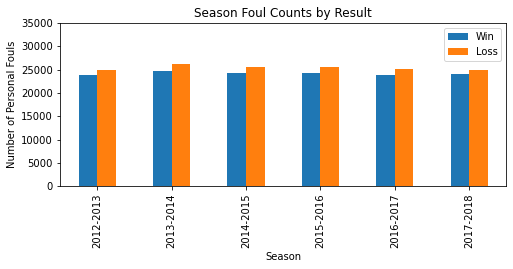

In [14]:
season_wl[["Win", "Loss"]].plot(kind="bar", figsize=(8,3)).legend(loc="upper right")
plt.title("Season Foul Counts by Result")
plt.ylabel("Number of Personal Fouls")
plt.xlabel("Season")
plt.ylim(0,35000)

plt.savefig("output_data/foulsbyresult")

In [15]:
#Number of games before and after break *divided by 2 to account for home/away
season_groups = sorted_df.groupby(["season", "all-star break"])
season_counts = season_groups["gmTime"].count()
season_df = pd.DataFrame(season_groups["gmTime"].count())
season_avg = season_df.groupby(["all-star break"])
season_avg.mean()/2

,gmTime
all-star break,
after,423.833333
before,806.000000


In [16]:
#Plot fouls of by season relative to all-star break (sum)
by_break_mean = sorted_df.groupby(["season", "all-star break"])
by_break_mean["teamPF"].mean()
break_df_mean = by_break_mean["teamPF"].mean()
break_df_mean

season_break_mean = pd.DataFrame(break_df_mean).reset_index()
season_break_mean = season_break_mean.set_index(["season", "all-star break"])["teamPF"].unstack()
season_break_mean

all-star break,after,before
season,,
2012-2013,19.714141,19.931880
2013-2014,20.781179,20.655260
2014-2015,19.964120,20.350251
2015-2016,20.174825,20.314607
2016-2017,19.555118,20.053004
2017-2018,19.539726,19.983237


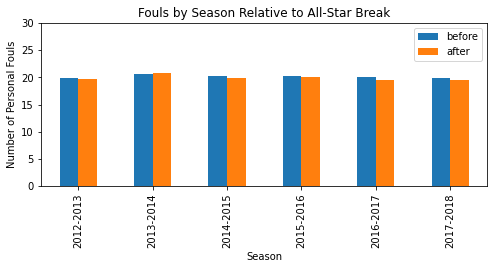

In [17]:
season_break_mean[["before", "after"]].plot(kind="bar", figsize=(8,3)).legend(loc="upper right")
plt.title("Fouls by Season Relative to All-Star Break")
plt.ylabel("Number of Personal Fouls")
plt.xlabel("Season")
plt.ylim(0,30)

plt.savefig("output_data/foulsbybreaksum")

In [18]:
#Plot fouls by season relative to all-star break (mean)

by_break_mean = sorted_df.groupby(["season", "all-star break"])
by_break_mean["teamPF"].mean()
break_df_mean = by_break_mean["teamPF"].mean()
break_df_mean

season_break_mean = pd.DataFrame(break_df_mean).reset_index()
season_break_mean = season_break_mean.set_index(["season", "all-star break"])["teamPF"].unstack()
season_break_mean

all-star break,after,before
season,,
2012-2013,19.714141,19.931880
2013-2014,20.781179,20.655260
2014-2015,19.964120,20.350251
2015-2016,20.174825,20.314607
2016-2017,19.555118,20.053004
2017-2018,19.539726,19.983237


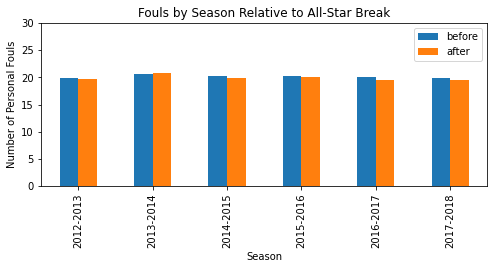

In [19]:
season_break_mean[["before", "after"]].plot(kind="bar", figsize=(8,3)).legend(loc="upper right")
plt.title("Fouls by Season Relative to All-Star Break")
plt.ylabel("Number of Personal Fouls")
plt.xlabel("Season")
plt.ylim(0,30)
plt.savefig("output_data/foulsbybreakmean")

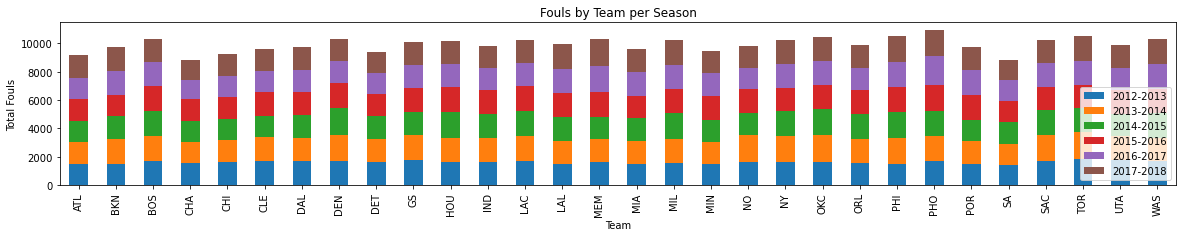

In [20]:
#Plot fouls by team per season???
team_season = sorted_df.groupby(["season", "teamAbbr"])
team_season["teamPF"].sum()
teamPF_season = team_season["teamPF"].sum()
teamPF_season

seasonPF_by_team = pd.DataFrame(teamPF_season).reset_index()
seasonPF_by_team = seasonPF_by_team.set_index(["teamAbbr", "season"])["teamPF"].unstack()
seasonPF_by_team.head()

#Stacked bar chart of fouls by team per season
seasonPF_by_team[["2012-2013", "2013-2014", "2014-2015", "2015-2016", "2016-2017", "2017-2018"]].plot(kind="bar", figsize=(20,3), stacked=True).legend(loc="lower right")
plt.title("Fouls by Team per Season")
plt.xlabel("Team")
plt.ylabel("Total Fouls")

plt.savefig("output_data/foulsbyteamperseason")

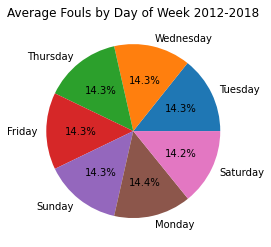

<Figure size 432x288 with 0 Axes>

In [25]:
#Average fouls by day of week
day_mean = sorted_df.groupby(["day_of_week"])
avg_teamPF_dow = day_mean["teamPF"].mean()

days = sorted_df["day_of_week"].unique()
#days

plt.pie(avg_teamPF_dow, labels=days, autopct="%1.1f%%")
plt.title("Average Fouls by Day of Week 2012-2018")
plt.show()

plt.savefig("output_data/foulsbyday")

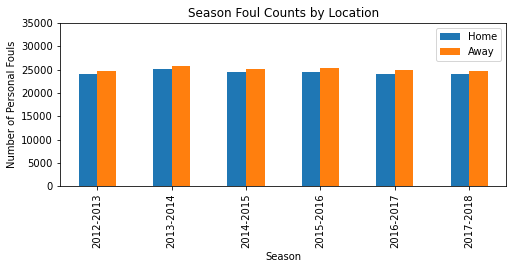

In [22]:
#Plot fouls of home team vs away team by season 
by_loc = sorted_df.groupby(["season", "teamLoc"])
by_loc["teamPF"].sum()
loc_df = by_loc["teamPF"].sum()
loc_df

# loc_df = by_loc["teamPF"].mean()
# loc_avg = loc_df.groupby(["teamLoc"])
# loc_avg.mean()

team_loc = pd.DataFrame(loc_df).reset_index()
team_loc = team_loc.set_index(["season", "teamLoc"])["teamPF"].unstack()
team_loc

team_loc[["Home", "Away"]].plot(kind="bar", figsize=(8,3)).legend(loc="upper right")
plt.title("Season Foul Counts by Location")
plt.ylabel("Number of Personal Fouls")
plt.xlabel("Season")
plt.ylim(0,35000)

plt.savefig("output_data/foulsbylocation")

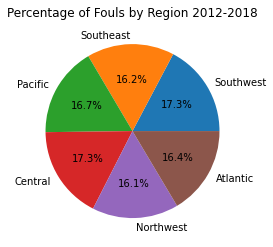

<Figure size 432x288 with 0 Axes>

In [24]:
#Pie chart for fouls by division
labels = sorted_df["teamDiv"].unique()

pie_fouls = sorted_df.groupby(["teamDiv"])
pie_count = pie_fouls["teamPF"].sum()
#pie_count

plt.pie(pie_count, labels=labels, autopct="%1.1f%%")
plt.title("Percentage of Fouls by Region 2012-2018")
plt.show()

plt.savefig("output_data/foulsbyregion")